# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df = pd.read_csv("data/temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
df["week"].value_counts()

week
Tues     52
Sat      50
Fri      50
Sun      49
Mon      49
Wed      49
Thurs    49
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["num_df"] = le.fit_transform(df["week"])
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,num_df
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5


In [7]:
week = {
    "Mon": 1, 
    "Tues": 2, 
    "Wed": 3,
    "Thurs": 4, 
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
}

df["num_dias"] = df["week"].replace(week)
df

C:\Users\Diego Nuñez\AppData\Local\Temp\ipykernel_10600\2940714047.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["num_dias"] = df["week"].replace(week)


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,num_df,num_dias
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0,5
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2,6
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3,7
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,5,2
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,6,3
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4,4
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,0,5


<Axes: ylabel='temp_1'>

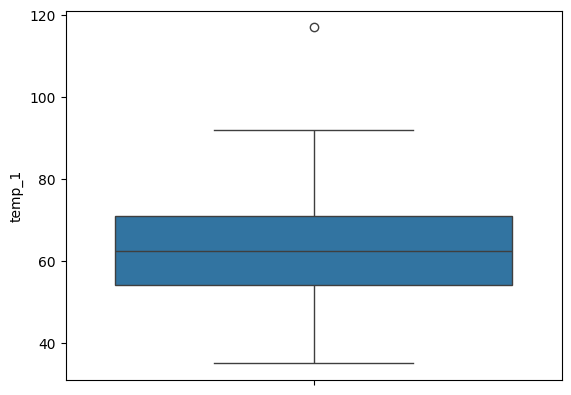

In [8]:
sns.boxplot(df["temp_1"])

<Axes: ylabel='temp_2'>

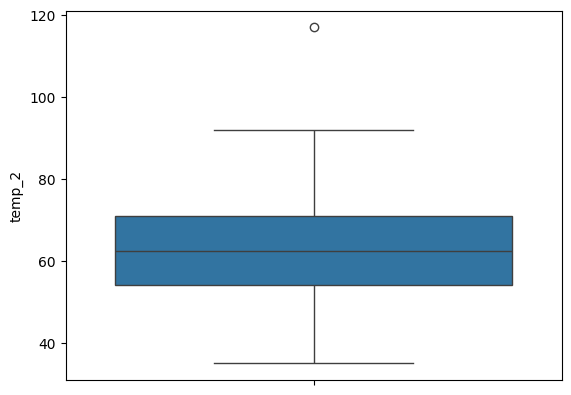

In [9]:
sns.boxplot(df["temp_2"])

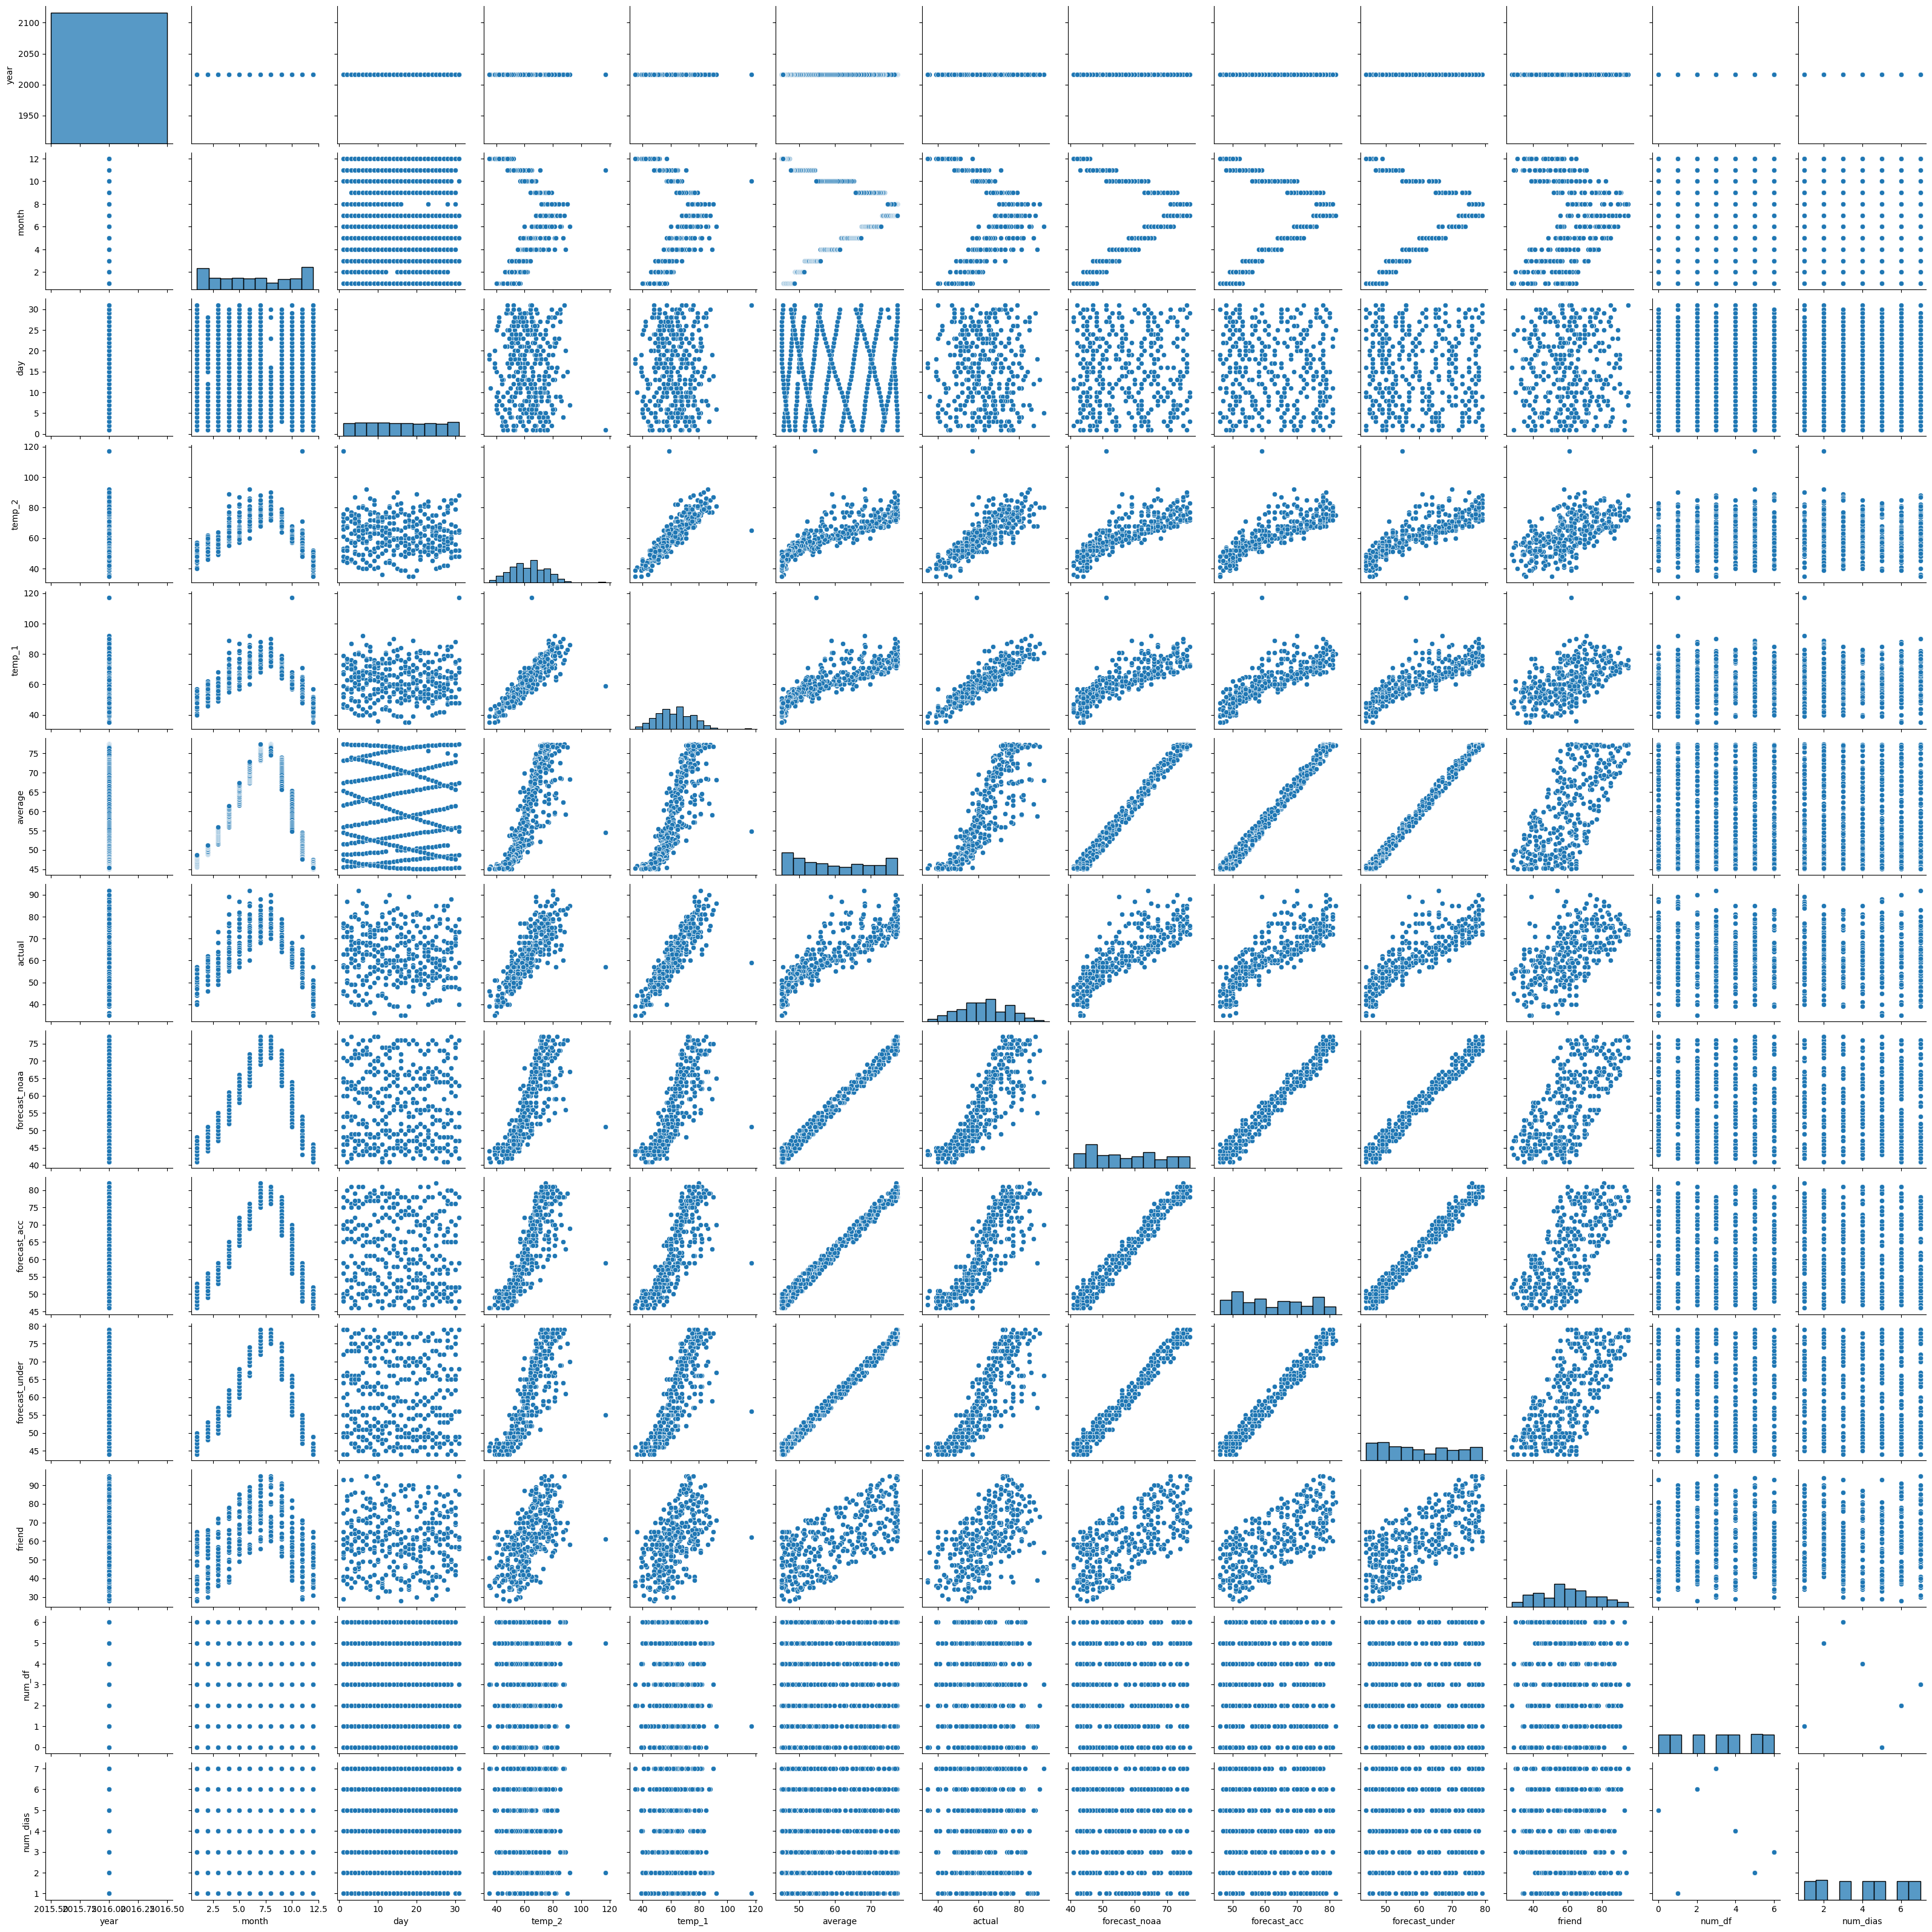

In [10]:
sns.pairplot(df)

<Axes: >

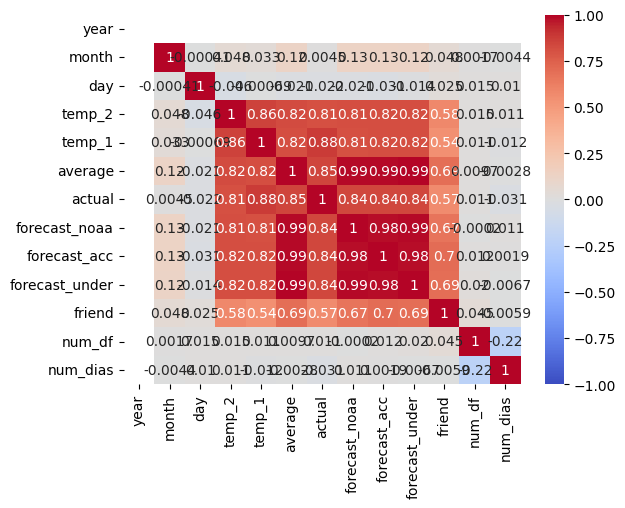

In [11]:
sns.heatmap(df.corr(numeric_only= True), annot= True, vmin=-1, cmap="coolwarm")

### 3. Selecciona variables y divide en train y test

In [31]:
X = df[["temp_2", "temp_1", "average", "friend", "forecast_noaa"]]
y = df["actual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(278, 5)
(278,)
(70, 5)
(70,)


### 4. Entrena el modelo


In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [14]:
print("Mae: ", metrics.mean_absolute_error(y_test, pred))
print("Mape: ", metrics.mean_absolute_percentage_error(y_test, pred))
print("Mse: ", metrics.mean_squared_error(y_test, pred))
print("Rmse: ", metrics. root_mean_squared_error(y_test, pred))
print("r2: ", metrics.r2_score(y_test, pred))

Mae:  5.142857142857143
Mape:  0.08058189590165715
Mse:  43.857142857142854
Rmse:  6.622472563713862
r2:  0.6904956678034843


In [15]:
dtr.score(X_test, y_test)

0.6904956678034843

### 6. Representa el árbol de decisión

[Text(0.49020846619897956, 0.9705882352941176, 'x[1] <= 62.5\nsquared_error = 137.169\nsamples = 278\nvalue = 62.147'),
 Text(0.2635522959183674, 0.9117647058823529, 'x[2] <= 49.25\nsquared_error = 51.487\nsamples = 137\nvalue = 52.905'),
 Text(0.3768803810586735, 0.9411764705882353, 'True  '),
 Text(0.09365433673469388, 0.8529411764705882, 'x[1] <= 45.5\nsquared_error = 29.209\nsamples = 62\nvalue = 47.016'),
 Text(0.04183673469387755, 0.7941176470588235, 'x[1] <= 41.5\nsquared_error = 16.966\nsamples = 21\nvalue = 41.714'),
 Text(0.012244897959183673, 0.7352941176470589, 'x[2] <= 45.15\nsquared_error = 12.512\nsamples = 11\nvalue = 39.818'),
 Text(0.00816326530612245, 0.6764705882352942, 'squared_error = 0.0\nsamples = 1\nvalue = 46.0'),
 Text(0.0163265306122449, 0.6764705882352942, 'x[0] <= 40.5\nsquared_error = 9.56\nsamples = 10\nvalue = 39.2'),
 Text(0.00816326530612245, 0.6176470588235294, 'x[3] <= 37.0\nsquared_error = 3.36\nsamples = 5\nvalue = 36.8'),
 Text(0.0040816326530612

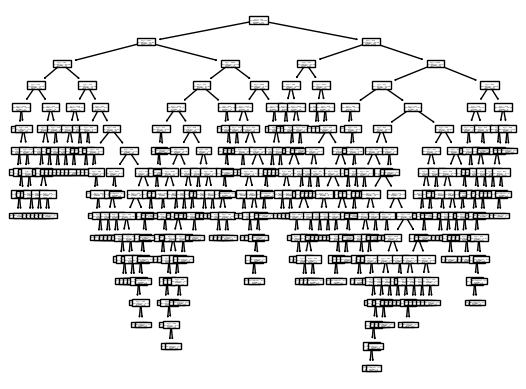

In [16]:
plot_tree(dtr)

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [17]:
dtr_2 = DecisionTreeRegressor(max_depth=3)
dtr_2.fit(X_train, y_train)
pred = dtr_2.predict(X_test)

### 8. Vuelve a evaluar tu modelo

In [18]:
print("Mae: ", metrics.mean_absolute_error(y_test, pred))
print("Mape: ", metrics.mean_absolute_percentage_error(y_test, pred))
print("Mse: ", metrics.mean_squared_error(y_test, pred))
print("Rmse: ", metrics. root_mean_squared_error(y_test, pred))
print("r2: ", metrics.r2_score(y_test, pred))

Mae:  4.254308906350133
Mape:  0.06491876934915675
Mse:  29.45885645122262
Rmse:  5.427601353380941
r2:  0.7921058441287924


### 9. Vuelve a representar su árbol

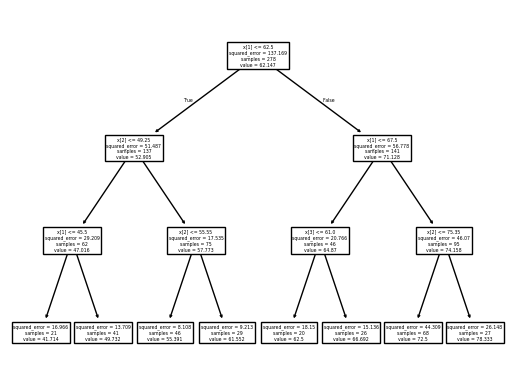

In [19]:
plot_tree(dtr_2);

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [32]:
dtr_3 = DecisionTreeRegressor()

parametros = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
              "min_samples_leaf": [15, 20, 25]
              }

dtr_gs = GridSearchCV(dtr_3, parametros, cv = 5, scoring="neg_mean_absolute_error", verbose=3)
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .max_depth=2, min_samples_leaf=15;, score=-5.196 total time=   0.0s
[CV 2/5] END .max_depth=2, min_samples_leaf=15;, score=-4.376 total time=   0.0s
[CV 3/5] END .max_depth=2, min_samples_leaf=15;, score=-4.625 total time=   0.0s
[CV 4/5] END .max_depth=2, min_samples_leaf=15;, score=-4.619 total time=   0.0s
[CV 5/5] END .max_depth=2, min_samples_leaf=15;, score=-4.647 total time=   0.0s
[CV 1/5] END .max_depth=2, min_samples_leaf=20;, score=-5.196 total time=   0.0s
[CV 2/5] END .max_depth=2, min_samples_leaf=20;, score=-4.376 total time=   0.0s
[CV 3/5] END .max_depth=2, min_samples_leaf=20;, score=-4.625 total time=   0.0s
[CV 4/5] END .max_depth=2, min_samples_leaf=20;, score=-4.619 total time=   0.0s
[CV 5/5] END .max_depth=2, min_samples_leaf=20;, score=-4.647 total time=   0.0s
[CV 1/5] END .max_depth=2, min_samples_leaf=25;, score=-5.196 total time=   0.0s
[CV 2/5] END .max_depth=2, min_samples_leaf=25;

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [15, 20, 25]},
             scoring='neg_mean_absolute_error', verbose=3)

In [33]:
print(dtr_gs.best_estimator_)
print(dtr_gs.best_params_)
print(dtr_gs.best_score_)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=15)
{'max_depth': 4, 'min_samples_leaf': 15}
-3.8447670417986983


In [34]:
modelo_final = DecisionTreeRegressor(max_depth=4, min_samples_leaf=15)
modelo_final.fit(X, y)


DecisionTreeRegressor(max_depth=4, min_samples_leaf=15)

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [23]:
modelo_final.feature_importances_

array([0.        , 0.19709631, 0.79435237, 0.00855132, 0.        ])

<Axes: >

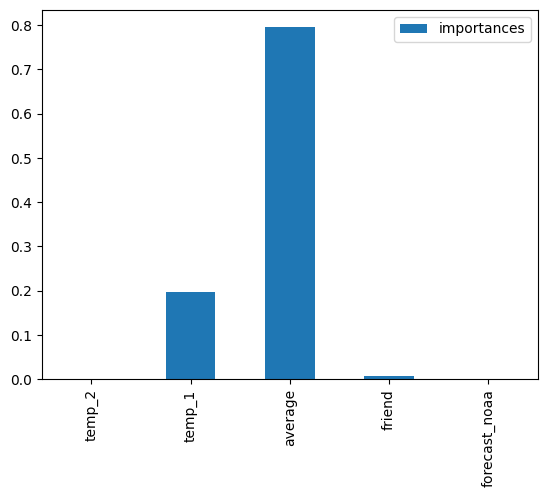

In [35]:
pd.DataFrame({"importances":modelo_final.feature_importances_}, index= X.columns).plot(kind= 'bar')

In [37]:
pred = modelo_final.predict([[45,45, 45.6, 43, 47]])
pred

c:\Users\Diego Nuñez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([46.40909091])

In [39]:
pred = modelo_final.predict([[0,45, 45.6, 43, 0]])
pred

c:\Users\Diego Nuñez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([46.40909091])

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [40]:
import numpy as np

In [41]:
df["target_c"] = np.where(df["actual"]>59, 1, 0)
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,num_df,num_dias,target_c
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0,5,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2,6,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3,7,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,1,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,5,2,0
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,6,3,0
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4,4,0
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,0,5,0


In [43]:
df["target_c"].value_counts(normalize=True)

target_c
1    0.586207
0    0.413793
Name: proportion, dtype: float64

In [44]:
X = df[["temp_1", "average"]]
y = df["target_c"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(278, 2)
(278,)
(70, 2)
(70,)


In [45]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()


parametros = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
              "min_samples_leaf": [15, 20, 25]
              }

modelo_gs = GridSearchCV(modelo, parametros, scoring="accuracy", verbose=3)
modelo_gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..max_depth=2, min_samples_leaf=15;, score=0.875 total time=   0.0s
[CV 2/5] END ..max_depth=2, min_samples_leaf=15;, score=0.857 total time=   0.0s
[CV 3/5] END ..max_depth=2, min_samples_leaf=15;, score=0.982 total time=   0.0s
[CV 4/5] END ..max_depth=2, min_samples_leaf=15;, score=0.836 total time=   0.0s
[CV 5/5] END ..max_depth=2, min_samples_leaf=15;, score=0.945 total time=   0.0s
[CV 1/5] END ..max_depth=2, min_samples_leaf=20;, score=0.875 total time=   0.0s
[CV 2/5] END ..max_depth=2, min_samples_leaf=20;, score=0.911 total time=   0.0s
[CV 3/5] END ..max_depth=2, min_samples_leaf=20;, score=0.982 total time=   0.0s
[CV 4/5] END ..max_depth=2, min_samples_leaf=20;, score=0.836 total time=   0.0s
[CV 5/5] END ..max_depth=2, min_samples_leaf=20;, score=0.945 total time=   0.0s
[CV 1/5] END ..max_depth=2, min_samples_leaf=25;, score=0.875 total time=   0.0s
[CV 2/5] END ..max_depth=2, min_samples_leaf=25

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [15, 20, 25]},
             scoring='accuracy', verbose=3)

In [46]:
print(modelo_gs.best_estimator_)
print(modelo_gs.best_params_)
print(modelo_gs.best_score_)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)
{'max_depth': 2, 'min_samples_leaf': 20}
0.9099350649350649


In [47]:
modelo_final = modelo_gs.best_estimator_
modelo_final.fit(X, y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)

In [49]:
modelo_final.feature_importances_

array([0.07045481, 0.92954519])

<Axes: >

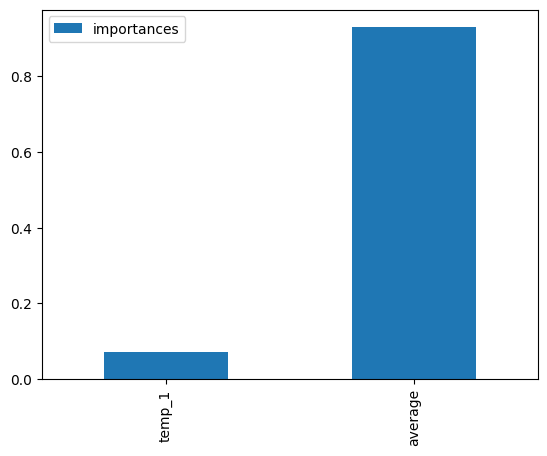

In [48]:
pd.DataFrame({"importances":modelo_final.feature_importances_}, index= X.columns).plot(kind= 'bar')